In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from load_dataset import load_data
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score
import json
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 9

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
def heatmap(donnee):
    # Calculer la matrice de corrélation
    correlation_matrix = donnee.corr()

    # Créer un Heatmap
    plt.figure(figsize=(25, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap Correlation')
    plt.show()

In [3]:
def conf_matrix(true, preds):
    matrice_confusion = confusion_matrix(y_true=true, y_pred=preds)

    # Créer un Heatmap
    plt.figure(figsize=(25, 10))
    sns.heatmap(matrice_confusion, annot=True, cmap='Blues', fmt="d", cbar=False, xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Prédiction')
    plt.ylabel('Vrai')
    plt.title('Matrice de confusion')
    plt.show()


In [4]:
def features_importance(clf, X_train_columns, plot=False):
    if plot == False:
        feat_imp = clf.feature_importances_ 
        feat_df = pd.DataFrame(feat_imp, index=X_train_columns, columns=["Importance"])
        return feat_df.sort_values(by="Importance", ascending=False)
    else:
        importance = clf.feature_importances_
        indices = np.argsort(importance)
        features = X_train_columns
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importance[indices], color='g', align='center')
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

In [5]:
X, y, cat_feat = load_data().get_data_X_y(data='simplify', OneHot=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [6]:
# SVC
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.9072543617998163

In [7]:
# # Get the support vectors and their coefficients
# support_vectors = svc_clf.support_vectors_
# coefficients = svc_clf.coef_.ravel()

# # Calculate the feature importance based on the coefficients of support vectors
# feature_importance = np.mean(np.abs(coefficients) * np.linalg.norm(support_vectors, axis=1))

# # Print or use the feature importance values
# print("Feature Importance:", feature_importance)

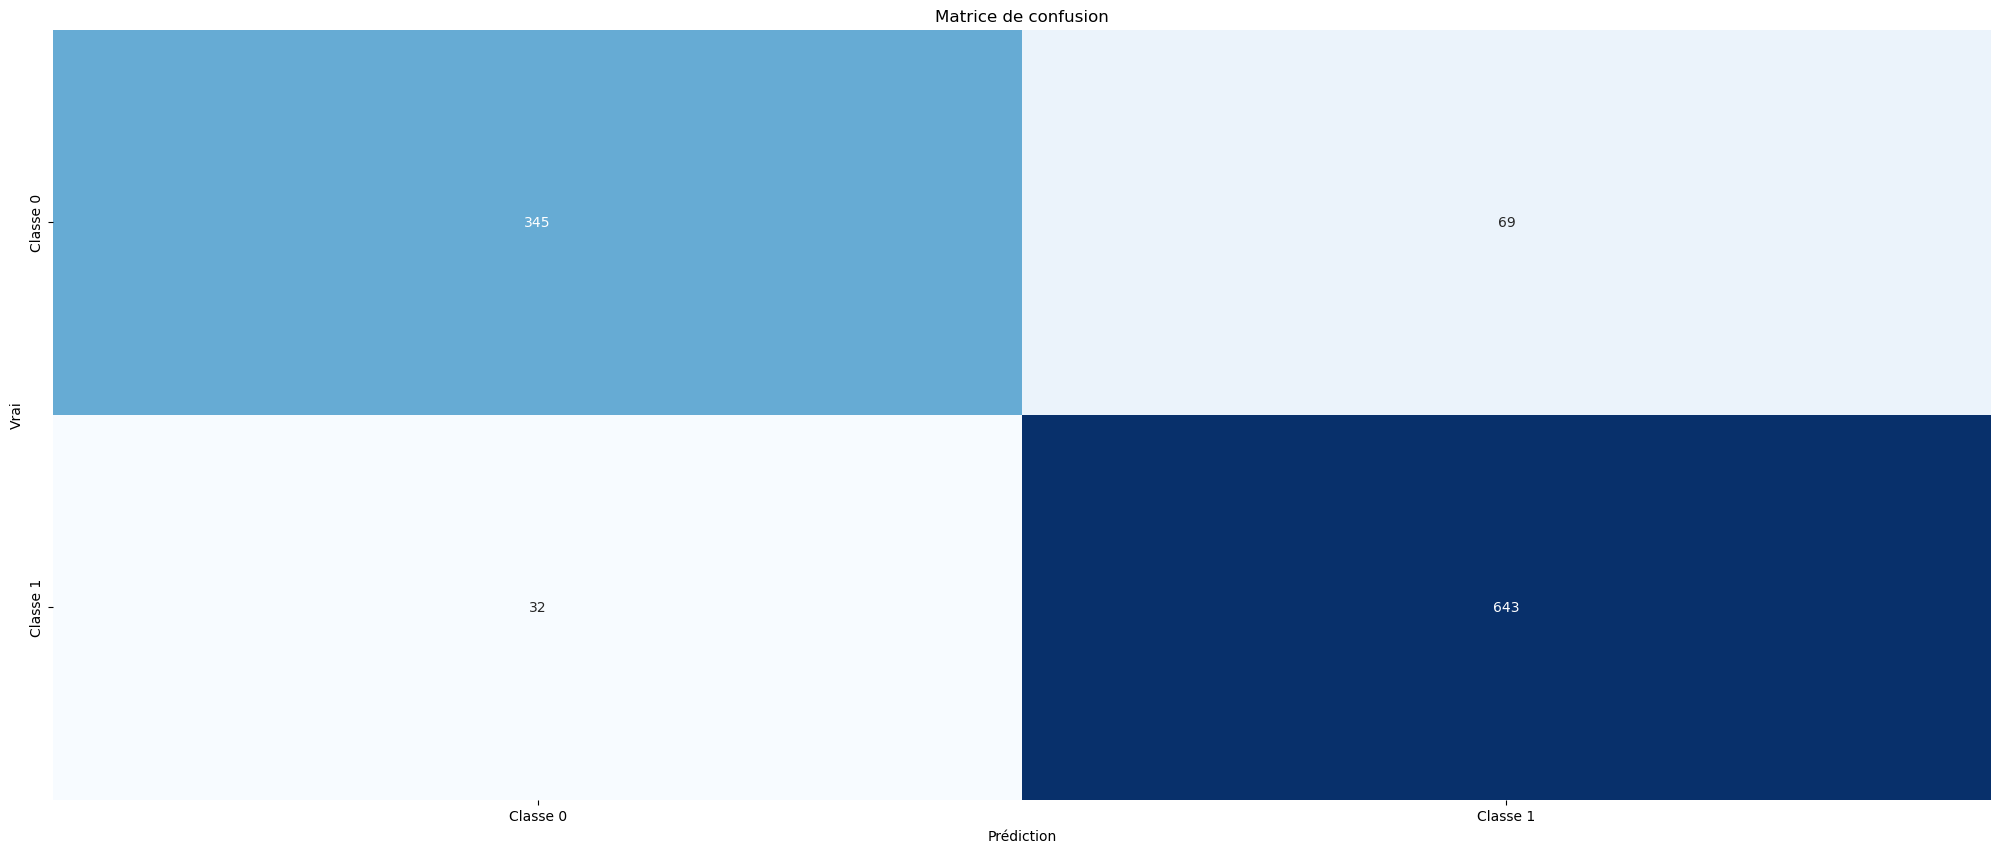

In [8]:
conf_matrix(y_test, svc_clf.predict(X_test))

In [9]:
acc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
f1_scores = cross_val_score(svc_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

# Print the cross-validated scores
print("Cross-validated Scores (Acc):", acc_scores)
print("Cross-validated Scores (F1):", f1_scores)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", acc_scores.mean())
print("Mean F1:", f1_scores.mean())

Cross-validated Scores (Acc): [0.92337917 0.89173228 0.90944882 0.90748031 0.91338583]
Cross-validated Scores (F1): [0.93915757 0.9122807  0.92721519 0.92667707 0.92993631]
Mean Accuracy: 0.9090852837894282
Mean F1: 0.9270533661491246


In [10]:
X, y, cat_feat = load_data().get_data_X_y(data='simplify', Scaler='MinMax')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [11]:
# LogisticRegression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8999081726354453

In [12]:
X, y, cat_feat = load_data().get_data_X_y(data='simplify')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [13]:
# CatBoost
cat_clf = CatBoostClassifier(cat_features=cat_feat, random_state=42, verbose=0)
cat_clf.fit(X_train, y_train, verbose=0)
cat_clf.score(X_test, y_test)

0.9146005509641874

In [14]:
acc_scores = cross_val_score(cat_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
f1_scores = cross_val_score(cat_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

# Print the cross-validated scores
print("Cross-validated Scores (Acc):", acc_scores)
print("Cross-validated Scores (F1):", f1_scores)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", acc_scores.mean())
print("Mean F1:", f1_scores.mean())

Cross-validated Scores (Acc): [0.91748527 0.90748031 0.91338583 0.91338583 0.8976378 ]
Cross-validated Scores (F1): [0.934375   0.92575039 0.92993631 0.93081761 0.91798107]
Mean Accuracy: 0.9098750058010922
Mean F1: 0.9277720766590578


In [15]:
# XGBoost
xgb_clf = XGBClassifier(random_state=42, enable_categorical=True, tree_method="hist")
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.8953168044077136

In [16]:
# RandomForest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9017447199265382

In [17]:
# DecisionTree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.852157943067034

In [18]:
# Prenons CatBoost
X, y, cat_feat = load_data().get_data_X_y(data='simplify')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Define the parameter grid to search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

# Create a CatBoostClassifier
catboost_model = CatBoostClassifier(cat_features=cat_feat, verbose=0)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPUs
    verbose=3,  # Set to 1 or higher for verbosity
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

grid_search.score(X_test, y_test)
# # CatBoost
# cat_clf = CatBoostClassifier(cat_features=cat_feat, verbose=0)
# cat_clf.fit(X_train, y_train)
# cat_clf.score(X_test, y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=0.862 total time=   0.8s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=0.897 total time=   0.8s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.903 total time=   0.8s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=0.909 total time=   0.9s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=0.896 total time=   0.9s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=0.904 total time=   0.9s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=0.894 total time=   0.9s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.917 total time=   0.9s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.01;, score=0.869 total time=   

0.9100091827364555

In [19]:
model = grid_search.best_estimator_

In [20]:
model.score(X_test, y_test)

0.9100091827364555

In [21]:
features_importance(model, X_train.columns)

Importance
Unités curriculaires 2e semestre (approuvées)        30.241780
Frais de scolarité à jour                            10.068112
Unités curriculaires 2e semestre (inscrits)           6.960194
Unités curriculaires 1er semestre (approuvées)        4.957907
Unités curriculaires 2e semestre (note)               4.812973
Cours                                                 4.274072
Unités curriculaires 1er semestre (inscrits)          4.242030
Unités curriculaires 2e semestre (évaluations)        3.717706
Unités curriculaires 1er semestre (note)              3.518832
Âge à l'inscription                                   2.917129
Bourse                                                2.500076
Occupation mère                                       2.092713
Qualification mère                                    1.896592
Qualification père                                    1.855999
PIB                                                   1.640743
Mode d'application                                    1.598695
Dettes                                                1.430420
Ordre d'application                                   1.421157
Occupation père                                       1.386992
Unités curriculaires 1er semestre (évaluations)       1.181298
Qualification antérieure                              0.997856
Taux de chômage                                       0.911164
Sexe                                                  0.827319
Taux d'inflation                                      0.816163
Unités curriculaires 1er semestre (créditées)         0.772834
Unités curriculaires 2e semestre (créditées)          0.763379
État civil                                            0.635308
Unités curriculaires 2e semestre (sans évaluati...    0.412689
Présence jour/soir                                    0.351208
Unités curriculaires 1er semestre (sans évaluat...    0.311813
Déplacé                                               0.211908
International                                         0.206041
Besoins éducatifs spéciaux                            0.066899

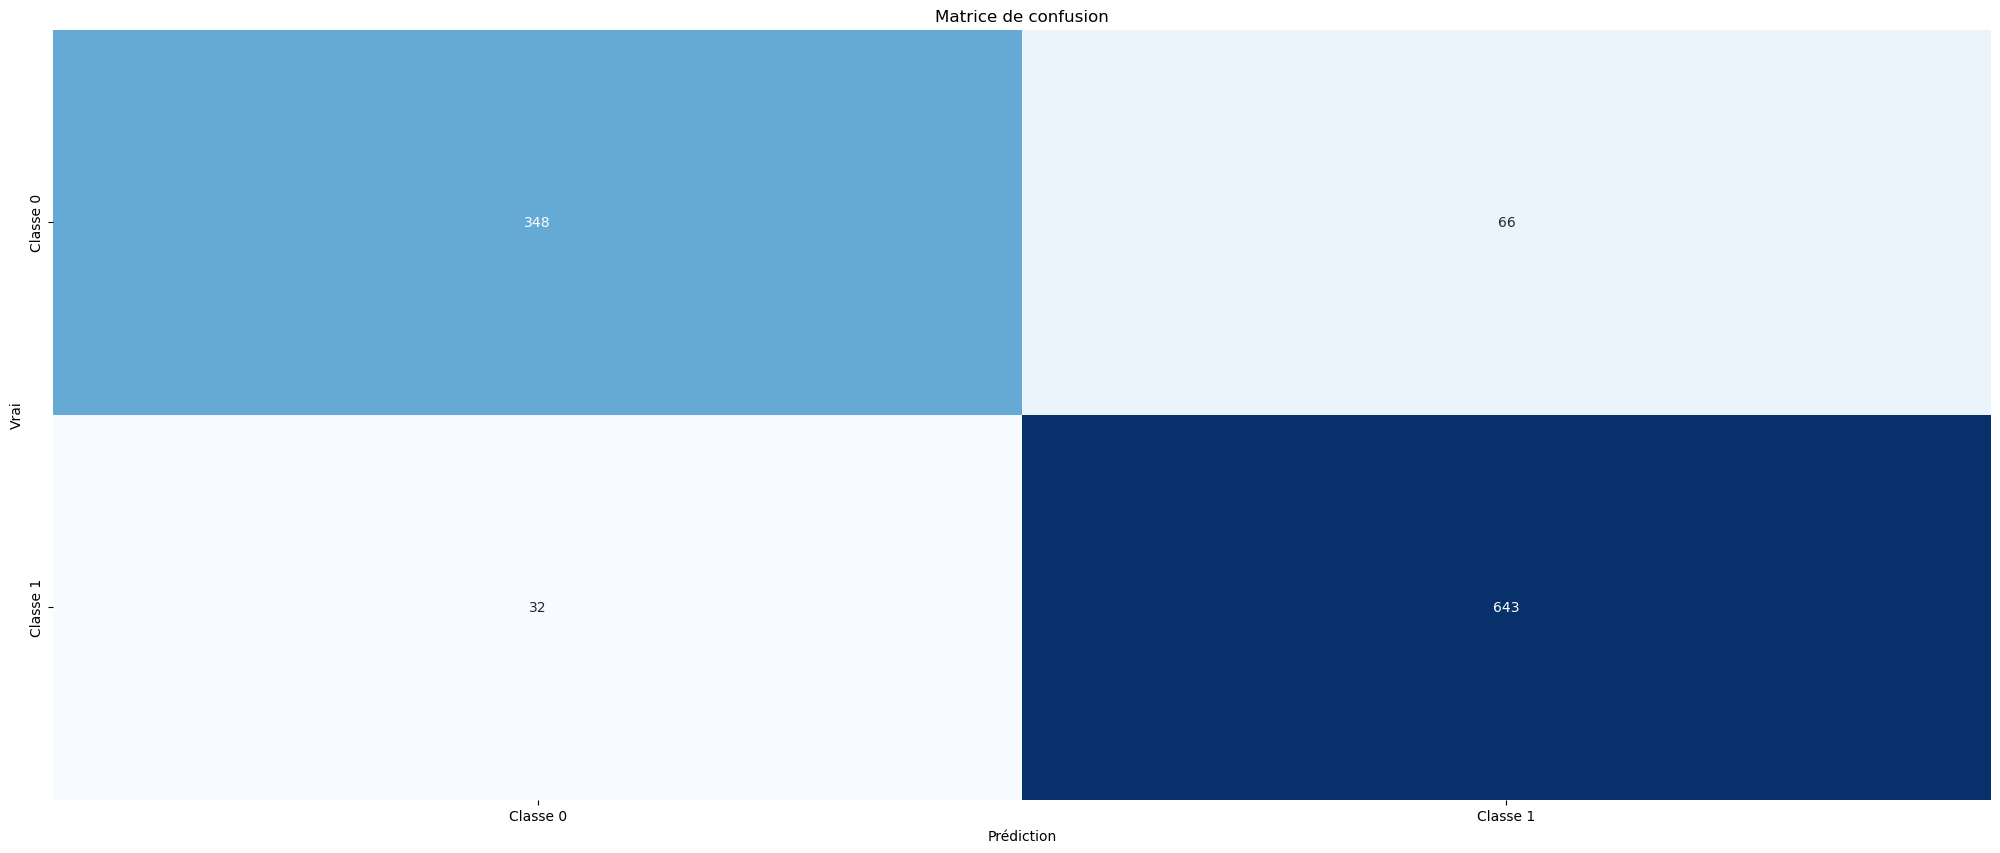

In [22]:
conf_matrix(y_test, model.predict(X_test))

Objectif : On veut comprendre les prédictions du modèle, les bonnes et les mauvaises et tirer des conclusions sur les facteurs prédictifs

In [23]:
shap.initjs()

In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

In [25]:
shap.plots.force(shap_values, link="logit", figsize=(10, 1))

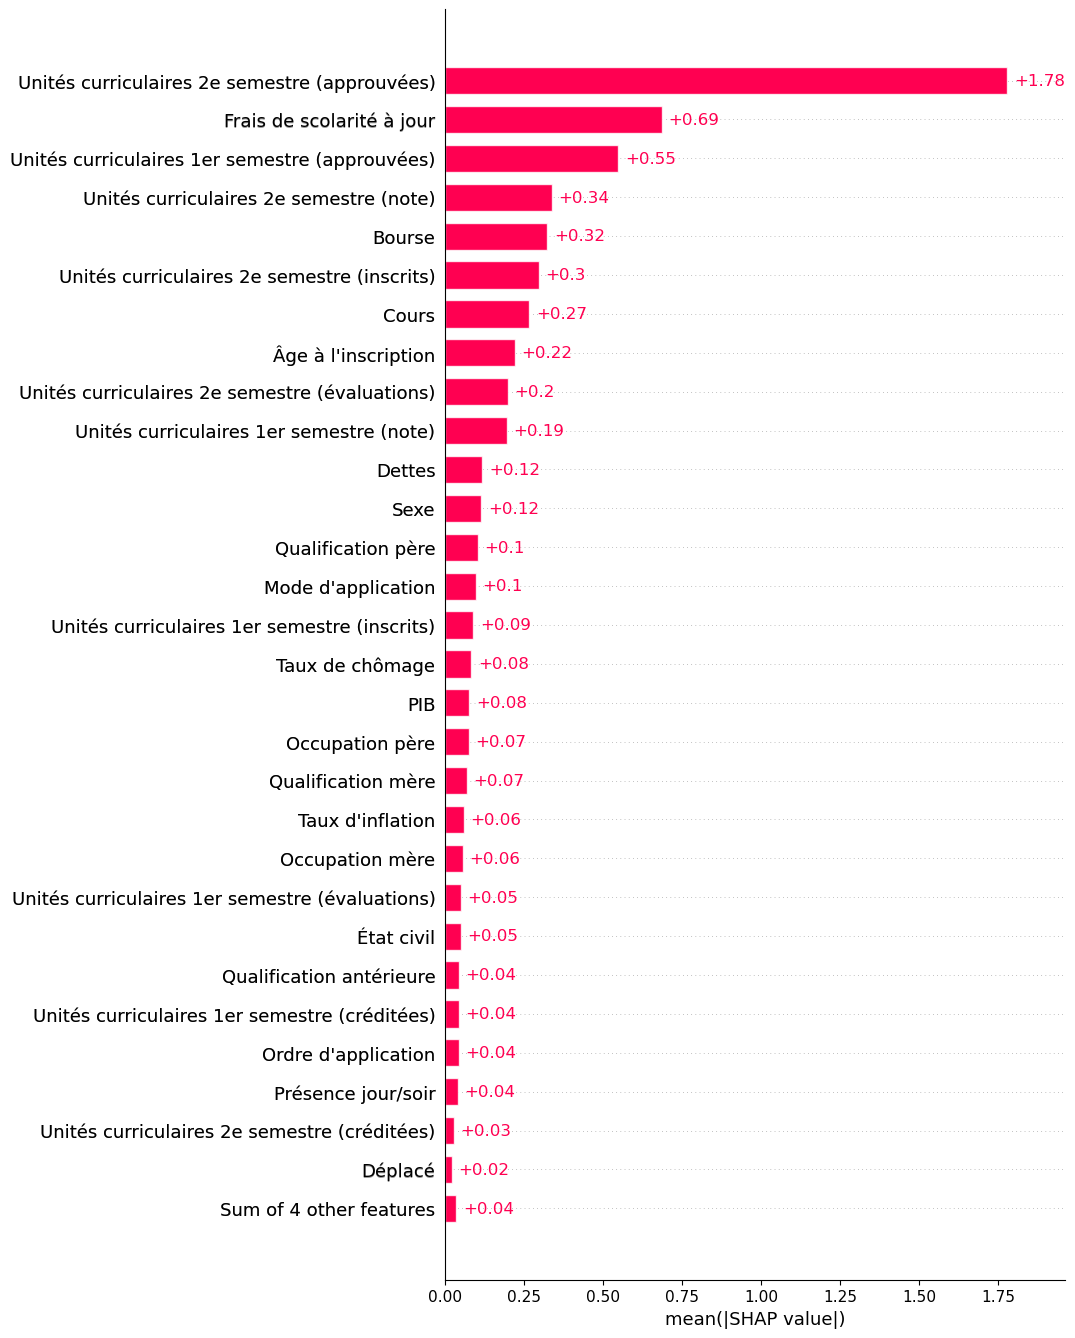

In [26]:
#Mean SHAP
shap.plots.bar(shap_values, max_display=30)

In [42]:
def get_mean_impact_shap_category(shap_values, X_train, category):
    index_cat = X_train.columns.tolist().index(category)
    values = shap_values.values[:, index_cat]
    data = shap_values.data[:, index_cat]

    mean_shap_values = []
    value_names = []

    with open('./donnee_info_clean.json', 'r') as openfile:
        donnee_info = json.load(openfile)

    for cat_val in np.unique(data):
        mean_shap_values.append(values[np.where(data == cat_val)].mean())
        value_names.append(donnee_info[category][str(int(cat_val))])

    print(f"Moyenne des valeurs SHAP pour chaque catégories du feature : {category}")
    print("---------------------------------------------------------------------------")


    df = pd.DataFrame(np.array(mean_shap_values), index=np.unique(data), columns=["Valeur SHAP moyenne"])
    df = pd.concat([df, pd.DataFrame(value_names, index=np.unique(data), columns=["Nom catégorie"])], axis=1)
    return df.sort_values(by='Valeur SHAP moyenne', ascending=False)

In [43]:
get_mean_impact_shap_category(shap_values, X_train, "Cours")

Moyenne des valeurs SHAP pour chaque catégories du feature : Cours
---------------------------------------------------------------------------


Valeur SHAP moyenne                                      Nom catégorie
9.0              0.283404                                     Service social
5.0              0.167764                      Soins infirmiers vétérinaires
14.0             0.162002                       Journalisme et communication
2.0              0.160641               Conception d'animation et multimédia
13.0             0.139711            Gestion de la publicité et du marketing
11.0             0.137525                                    Soins infirmier
10.0             0.131438                                           Tourisme
8.0              0.129628                                            Gestion
4.0              0.043956                       Conception de communications
3.0             -0.090054                                          Agronomie
12.0            -0.455716  Hygiène buccale (Dentiste ou Hygiéniste dentaire)
15.0            -0.929038                                  Éducation de base
7.0             -1.171262                                      Équiniculture
1.0             -1.189287        Technologies de production de biocarburants
6.0             -1.453756                                 Génie informatique

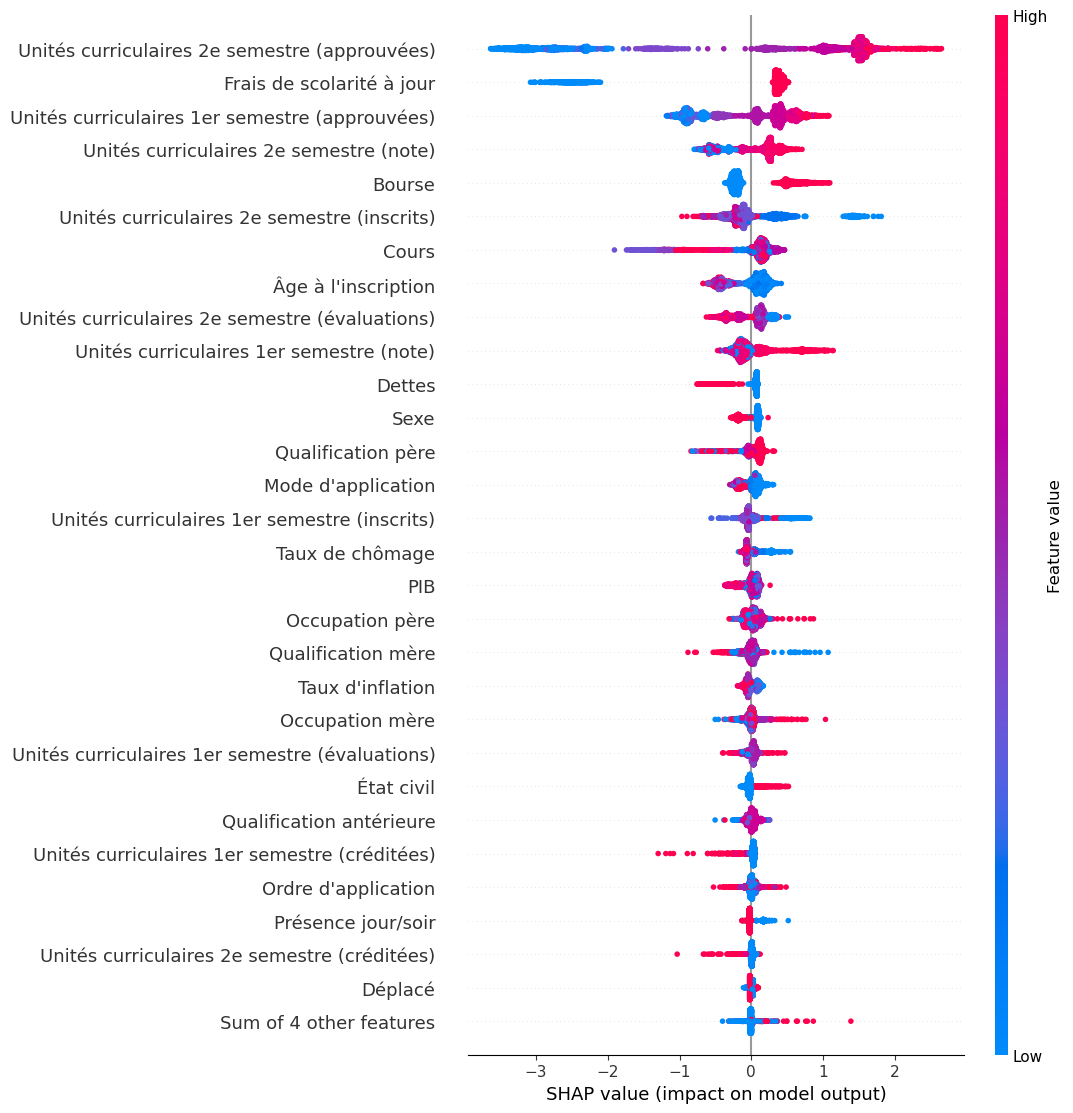

In [29]:
# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=30)